# Rosy sweep 3

3 najlepší model podľa val_acc

4 najlepší podľa val_loss

parametre: relu, 128 batch size, 0.25 dropout, RMSprop, 15 epoch

https://wandb.ai/motuziik/model_optimization/runs/lotgb2ep

In [2]:
 !nvidia-smi

Thu May  6 23:32:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K40c          Off  | 00000000:01:00.0 Off |                    0 |
| 28%   57C    P0    73W / 235W |      0MiB / 11441MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Import knižníc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D,ZeroPadding2D
#from tensorflow.keras.utils import np_utils, plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.layers.normalization import BatchNormalization
#from tensorflow.keras.layers.convolutional import *
import array
from sklearn.metrics import confusion_matrix, classification_report
import itertools 
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.model_selection import train_test_split

Načítanie a rozdelenie dát

In [4]:
train = np.load('../data/zaloha-sdss/oct2019/data_final_train.npz')
test = np.load('../data/zaloha-sdss/oct2019/data_final_test.npz')
x_train = train['train_data'].reshape(train['train_data'].shape[0], 128, 128, 1)
x_test = test['test_data'].reshape(test['test_data'].shape[0], 128, 128, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(train['train_targets'], 2)
y_test = to_categorical(test['test_targets'], 2)
X = np.concatenate([x_train,x_test])
Y = np.concatenate([y_train,y_test])
x_tr, x_test, y_tr, y_test = train_test_split(X,Y,test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=0.2)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(30394, 128, 128, 1)
(9499, 128, 128, 1)
(7599, 128, 128, 1)
(30394, 2)
(9499, 2)
(7599, 2)


Začíname vrstviť neurónku AlexNet Architecture

In [7]:
model = Sequential()

In [8]:
model.add(ZeroPadding2D((1,1),input_shape=(128, 128,1)))

In [9]:
model.add(Conv2D(64, 3, strides=1, activation='relu')) 

In [10]:
model.add(MaxPool2D(pool_size = 3, strides = 2))

In [11]:
model.add(Conv2D(64, 5, strides=1, padding='same', activation='relu'))

In [12]:
model.add(MaxPool2D(pool_size = 3, strides = 2))

In [13]:
model.add(Conv2D(64, 3, strides=1, padding='same', activation='relu'))

In [14]:
model.add(Conv2D(64, 3, strides=1, padding='same', activation='relu'))

In [15]:
model.add(MaxPool2D(pool_size = 3, strides = 2))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(96, activation='relu'))

In [18]:
model.add(Dropout(0.25)) 

In [19]:
model.add(Dense(96, activation='relu'))

In [20]:
model.add(Dropout(0.25)) 

In [21]:
model.add(Dense(2, activation='softmax'))

RMSprop Optimization

In [22]:
optim = RMSprop()

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

Aby sa uložil model s najlepším výsledkom:

In [24]:
saved_model = "rosy_sweep_3.hdf5"
checkpoint = ModelCheckpoint(saved_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [25]:
f = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint])

Epoch 1/20
238/238 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.7954
Epoch 00001: val_accuracy improved from -inf to 0.80919, saving model to rosy_sweep_3.hdf5
238/238 [==============================] - 53s 221ms/step - loss: 0.4485 - accuracy: 0.7954 - val_loss: 0.4517 - val_accuracy: 0.8092
Epoch 2/20
238/238 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.9006
Epoch 00002: val_accuracy improved from 0.80919 to 0.86301, saving model to rosy_sweep_3.hdf5
238/238 [==============================] - 51s 216ms/step - loss: 0.2636 - accuracy: 0.9006 - val_loss: 0.3474 - val_accuracy: 0.8630
Epoch 3/20
238/238 [==============================] - ETA: 0s - loss: 0.1977 - accuracy: 0.9322
Epoch 00003: val_accuracy improved from 0.86301 to 0.95170, saving model to rosy_sweep_3.hdf5
238/238 [==============================] - 51s 216ms/step - loss: 0.1977 - accuracy: 0.9322 - val_loss: 0.1678 - val_accuracy: 0.9517
Epoch 4/20
238/238 [===========

Načítanie modelu

In [2]:
print("Loading model....")
model = load_model('rosy_sweep_3.hdf5')

Loading model....


Vyhodnotenie test loss a accuracy

In [27]:
#na trénovacej množine 
score = model.evaluate(x_train, y_train, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0434517003595829
Test accuracy: 0.9855892658233643


In [28]:
#na testovacej množine
score1 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.07736121863126755
Test accuracy: 0.9797873497009277


In [29]:
model.summary() # ako sa menia dáta v modeli

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 130, 130, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)       

Predikcia

In [30]:
y_pred = model.predict(x_test)
prediction_int = np.zeros_like(y_pred)
prediction_int[y_pred > 0.5] = 1

Confusion Matrix

In [31]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [32]:
# TN / FN
# FP / TP
print(matrix)

[[4695   20]
 [ 172 4612]]


Classification Report

In [33]:
print(classification_report(y_test, prediction_int))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4715
           1       1.00      0.96      0.98      4784

   micro avg       0.98      0.98      0.98      9499
   macro avg       0.98      0.98      0.98      9499
weighted avg       0.98      0.98      0.98      9499
 samples avg       0.98      0.98      0.98      9499



Graf modelu

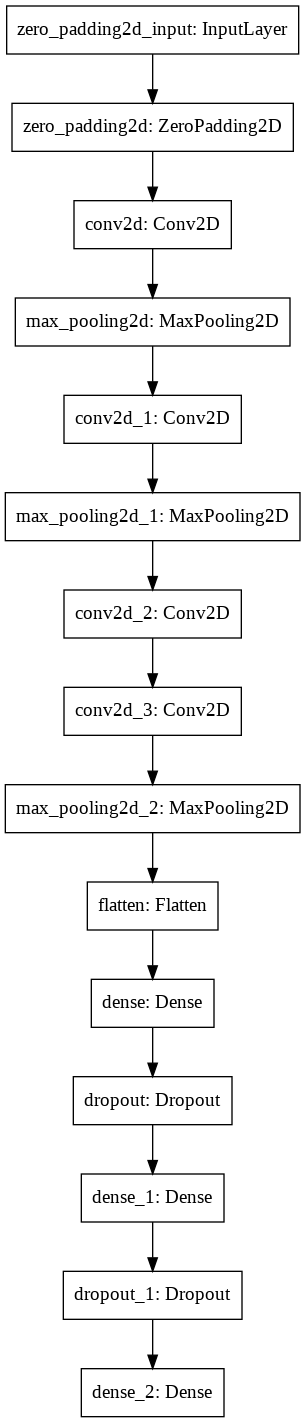

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='rosy_sweep_3.png')

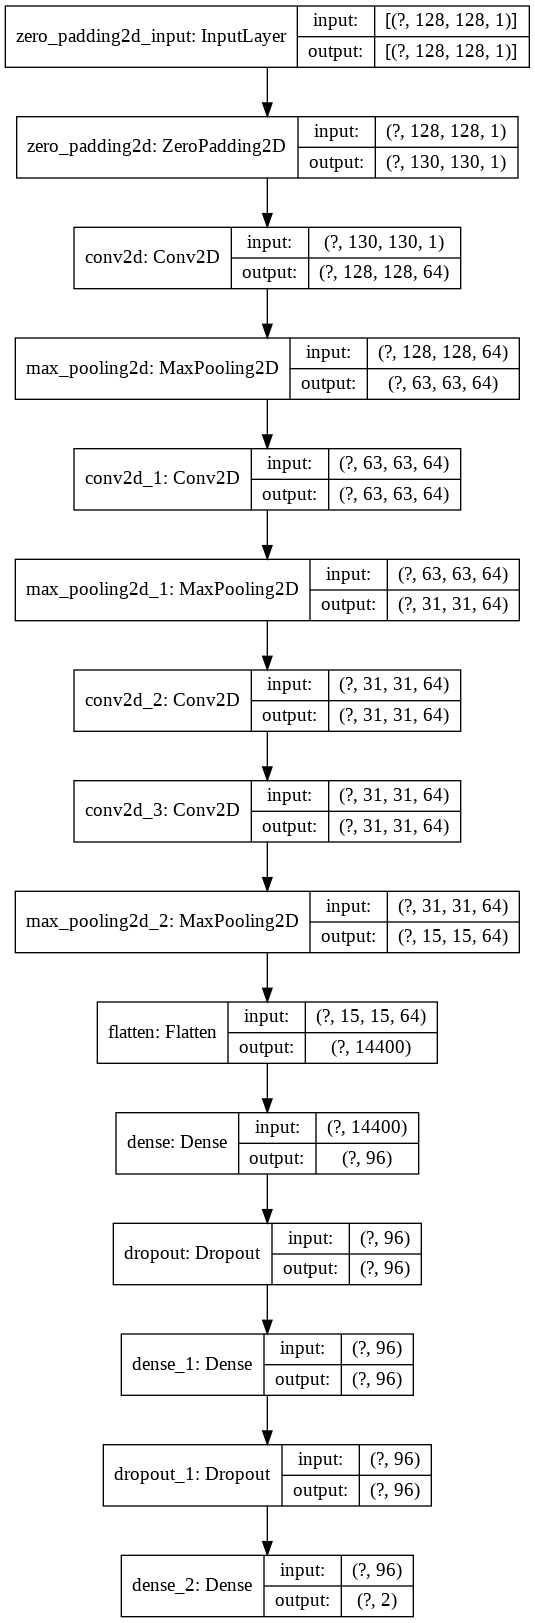

In [4]:
plot_model(model, to_file='rosy_sweep_3_shapes.png', show_shapes=True)